# 6.4 Supervised Machine Learning

## Contents
### Import libraries and dataframes
### Data prep
### Regression Analysis

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
%matplotlib inline

In [11]:
path = 'C:/Users/Jack Bartman/OneDrive/CareerFoundry/MV Trips'

In [13]:
# import trip data by state
tripS = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Trips_by_Distance_state_wrangeled.csv'))

#### 3. Asks to clean data. Data has been clean and wrangled in previous exercises

In [17]:
tripS.head(1)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,State
0,0,887,887,State,2019/01/01,NV,NaN,753054.0,2272063.0,9139676.0,...,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,Nevada


#### Data Prep

In [24]:
# create a scatterplot of 'Population Not Staying Home' vs 'Number of Trips'

tripS.plot(x='Population Not Staying at Home', y='Number of Trips', style='o')
plt.title('Population Not Staying Home vs Number of Trips')
plt.xlabel('Population Not Staying At Home')
plt.ylabel('Number of Trips')


Text(0, 0.5, 'Number of Trips')

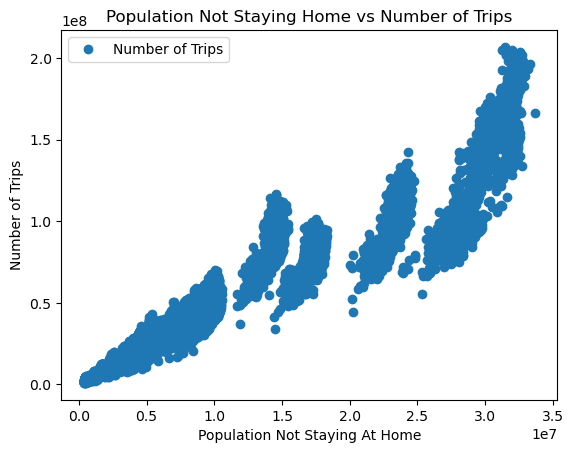

In [26]:
plt.show()

### HYPOTHESIS: There is a positive correlation between the Population Not Staying Home and the number of trips. This probably reflects that fact that the population not staying at home also has a positive correlation with the total population, what is surprising is how spread out the scatter plot is, this will make the ability to predict the y value from the X value difficult.

In [ ]:
# Create NumPy arrays

X=tripS['Population Not Staying at Home'].values.reshape(-1,1)
y=tripS['Number of Trips'].values.reshape(-1,1)

In [32]:
X

array([[ 2272063.],
       [16709556.],
       [  459278.],
       ...,
       [ 3118275.],
       [ 4690245.],
       [ 1405348.]])

In [34]:
y

array([[ 9139676.],
       [55258300.],
       [ 3114055.],
       ...,
       [15904538.],
       [26970162.],
       [ 7236616.]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Anaysis

In [40]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [46]:
# Plot regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =2)
plot_test.title('Population Not Staying at Home vs Number of Trips (Test set)')
plot_test.xlabel('Population Not Staying at Home')
plot_test.ylabel('Number of Trips')


Text(0, 0.5, 'Number of Trips')

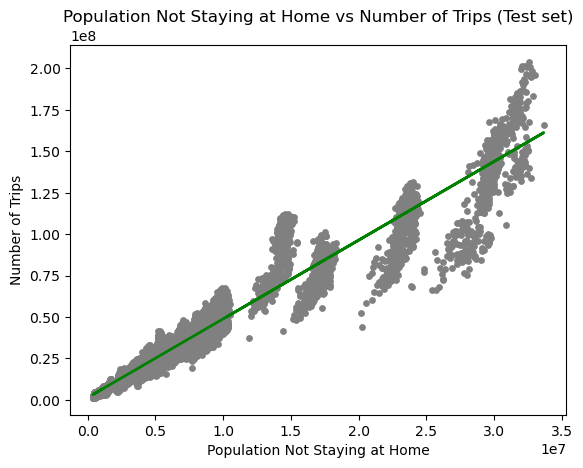

In [48]:
plot_test.show()

#### The regresion line from the training set seems to line up rther well with the test set 

In [51]:
# Calculate the mean root square and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.74564526]]
Mean squared error:  40910379701082.766
R2 score:  0.9461236318879678


In [55]:
# Compare predicted y values to actual in a dataframe

In [57]:
y_predicted

array([[ 6583095.44119477],
       [ 3613422.49542767],
       [13173909.27767992],
       ...,
       [ 6622844.96592877],
       [16598803.49978228],
       [50310600.37027256]])

In [59]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5334129.0,6.583095e+06
1,2632874.0,3.613422e+06
2,8283506.0,1.317391e+07
3,25078200.0,2.411095e+07
4,25182048.0,2.852604e+07
5,19295311.0,1.825036e+07
6,4640283.0,5.351311e+06
7,21714271.0,2.138236e+07
8,4213599.0,3.840150e+06
9,12095376.0,1.304440e+07


#### Slope of 4.7 indicates a positive correlation between people not staying at home and the number of trips. This confirms what is visable on the scatterplot
#### The RMS is large and does show that there is quite a bit of variation in y related to x. This is actually higher than I thought it would be.
#### R2 is 0.94, which is approaching 1, so that does show that this regression is a good fit to the trend of the data.
#### The y_predicted shows a lot of variations. This corresponds with the the large RMS. This data suggests that some people make a lot of trips will some people make very few.